# EOS for population dynamics

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

sys.path.append('.')
from model import AssociativeMemory, get_embeddings

torch.manual_seed(42)

In [2]:
# hyparameters
n = 30
alpha = 2.
d = 5

def f(x, epsilon=0):
    return x

# data
all_x = torch.arange(n)
proba = (all_x + 1.) ** (-alpha)
proba /= proba.sum()
all_y = f(all_x)

E = get_embeddings(all_x.max() + 1, d, norm=False)
U = get_embeddings(all_y.max() + 1, d, norm=False)

In [3]:
niter = 100
lr = 20.

# model
model = AssociativeMemory(E, U, random_init=True)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=niter, eta_min=0)

losses = torch.zeros(niter)
accs = torch.zeros(niter)
accs_start = torch.zeros(niter)
# lrs = torch.zeros(niter)

for i in range(niter):
    optimizer.zero_grad()

    # compute loss
    score = model(all_x)
    loss = (proba * F.cross_entropy(score, all_y, reduction='none')).sum()

    loss.backward()
    optimizer.step()
#     scheduler.step()
    
    # record statistics
    losses[i] = loss.item()
    accs[i] = (proba * (score.argmax(-1) == all_y).float()).sum()
    accs_start[i] = ((score.argmax(-1) == all_y)[:d]).float().mean()
#     lrs[i] = scheduler.get_last_lr()[0]

Text(0.5, 1.0, 'acc on first d memories')

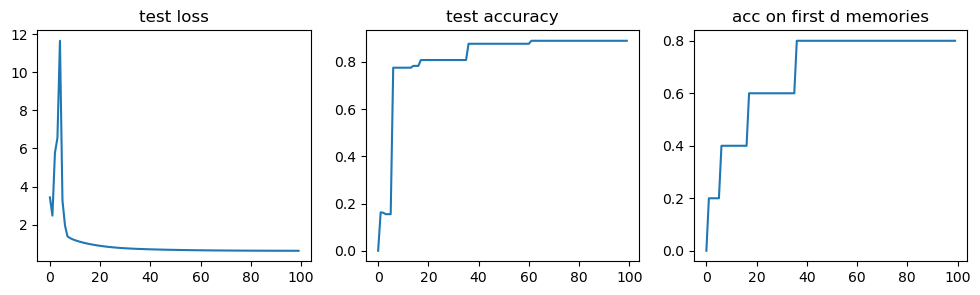

In [4]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(losses)
plt.title('test loss')
plt.subplot(1, 3, 2)
plt.plot(accs)
plt.title('test accuracy')
plt.subplot(1, 3, 3)
plt.plot(accs_start)
plt.title('acc on first d memories')